<a href="https://colab.research.google.com/github/trailrun/ML_books/blob/main/Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
breast = pd.read_csv('/content/drive/MyDrive/ML_sample/breast-cancer.csv')

<Axes: xlabel='diagnosis', ylabel='count'>

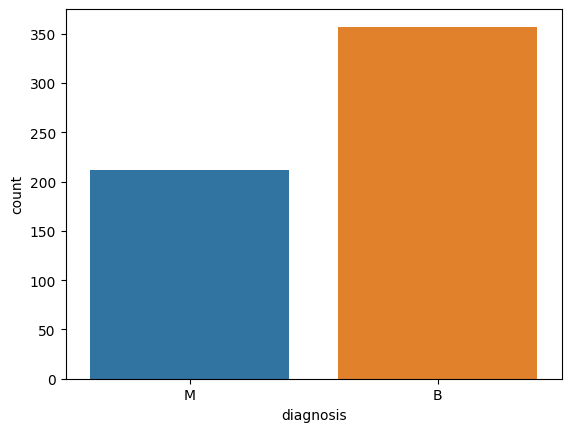

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(x='diagnosis', data=breast)

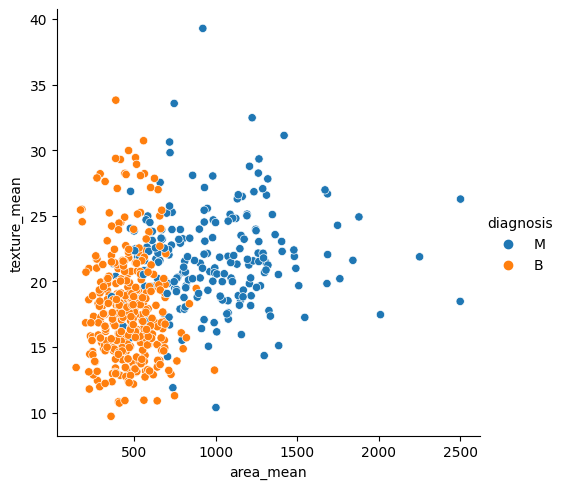

In [26]:
sns.relplot(x='area_mean', y='texture_mean', hue='diagnosis', data=breast)

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split

breast['diagnosis'] = np.where(breast['diagnosis']=="M", 1, 0)
features = ['area_mean', 'texture_mean']

X = breast[features]
y = breast['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape,y_test.shape)


(398, 2) (171, 2)
(398,) (171,)


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(estimator=DecisionTreeClassifier())
pred = clf.fit(x_train, y_train).predict(x_test)
print('Accuracy Score : ', clf.score(x_test, y_test))

Accuracy Score :  0.8947368421052632


In [31]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pred),
             index = ['True[0]', 'True[1]'],
             columns = ['Pred[0]', 'Pred[1]'])

,Pred[0],Pred[1]
True[0],101,6
True[1],12,52


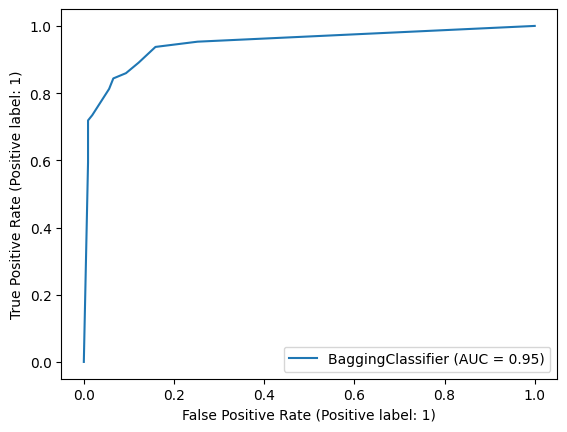

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()

In [35]:
R_A_score = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
print('ROC_AUC_score : ', R_A_score)

ROC_AUC_score :  0.9472838785046729


In [39]:
clf_oob = BaggingClassifier(estimator=DecisionTreeClassifier(), oob_score=True)
oob = clf_oob.fit(X, y).oob_score_
print(oob)

0.8769771528998243


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [40]:
import pandas as pd

car = pd.read_csv('/content/drive/MyDrive/ML_sample/CarPrice_Assignment.csv')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [46]:
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X = car_num[features]
y = car_num['price']
print(X.shape, y.shape)

(205, 13) (205,)


In [47]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

reg = BaggingRegressor(estimator = DecisionTreeRegressor(), oob_score=True)
reg = reg.fit(X, y)
reg.oob_score_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:1253: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


0.9142395654079103

## Boosting ##

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

breast = pd.read_csv('/content/drive/MyDrive/ML_sample/breast-cancer.csv')

breast['diagnosis'] = np.where(breast['diagnosis']=="M", 1, 0)
features = ['area_mean', 'texture_mean']

X = breast[features]
y = breast['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape)
print(y_train.shape,y_test.shape)


(398, 2) (171, 2)
(398,) (171,)


In [55]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(estimator = None)
pred = clf.fit(x_train, y_train).predict(x_test)
print('정확도 : ', clf.score(x_test, y_test))

정확도 :  0.9122807017543859


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))




[[102   5]
 [ 10  54]]


정확도	91.23%
정밀도	91.53%
재현율	84.38%


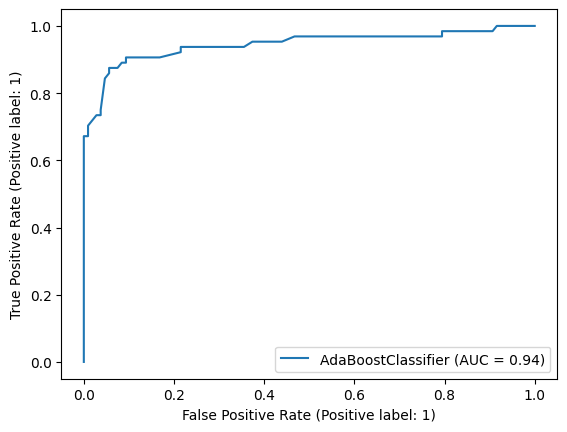

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()

In [59]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(X.columns)
feature_importance = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importance.columns = ['feature_nm', 'importances']
print(feature_importance)

     feature_nm  importances
0     area_mean         0.56
1  texture_mean         0.44


<BarContainer object of 2 artists>

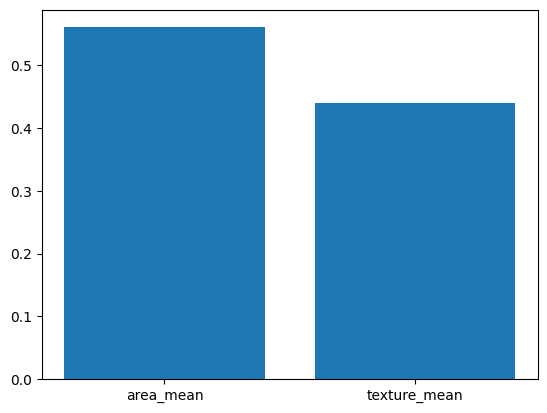

In [63]:
f = features
xtick_label_position = list(range(len(f)))
plt.xticks(xtick_label_position, f)
plt.bar([x for x in range(len(importances))], importances)


#AdaBoostRegressor#

In [65]:
import pandas as pd

car = pd.read_csv('/content/drive/MyDrive/ML_sample/CarPrice_Assignment.csv')
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))
X = car_num[features]
y = car_num['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)




In [66]:
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor(estimator=None)
pred = reg.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)

print('MSE\t{}'.format(round(mse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('ACC\t{}'.format(round(acc, 3)))




MSE	5351615.057
MAE	1760.11
RMSE	2313.356
ACC	0.911


In [67]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importance = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importance.columns = ['feature_nm', 'importances']
print(feature_importance)

          feature_nm  importances
0          boreratio     0.012071
1          carheight     0.006165
2          carlength     0.009165
3           carwidth     0.079982
4            citympg     0.022992
5   compressionratio     0.005288
6         curbweight     0.077864
7         enginesize     0.636360
8         highwaympg     0.061356
9         horsepower     0.043455
10           peakrpm     0.010161
11            stroke     0.005300
12         wheelbase     0.029841


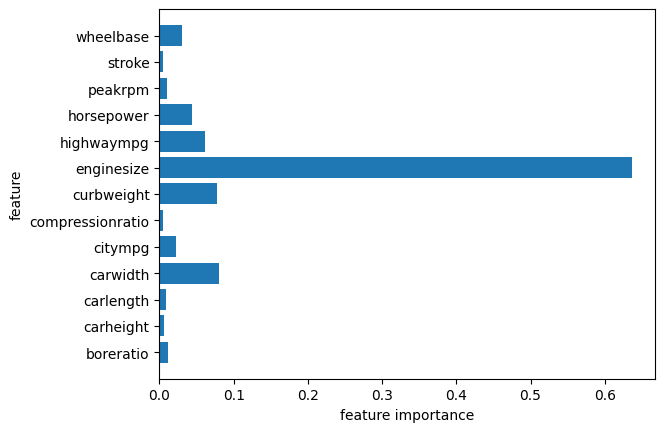

In [74]:


n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align='center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()
